# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv",encoding='latin1',parse_dates=True,index_col = 'Date')

In [ ]:
# Used the encoding as latin1 because there are some special characters in the file

In [ ]:
bike_df = df.copy()

In [ ]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-12 to 2018-11-30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), objec

In [ ]:
bike_df.shape

(8760, 13)

In [ ]:
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# No null vlaues present in dataset

In [ ]:
bike_df.duplicated().sum()

0

In [ ]:
# No duplicated values in dataset

In [ ]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Checking for Outliers in numerical datasets
# hour is timestamp so converting it into object data type
bike_df['Hour'] = bike_df['Hour'].astype('object')

In [ ]:
# Extracting year, day and month from Date
bike_df['Year'] = [x.year for x in bike_df.index]
bike_df['Month'] = [x.month_name() for x in bike_df.index]
bike_df['Day'] = [x.day_name() for x in bike_df.index]

In [ ]:
bike_df['Year'] = bike_df['Year'].astype('object')

In [ ]:
numerical_features = bike_df.select_dtypes(exclude='object')
categorical_features = bike_df.select_dtypes(include='object')

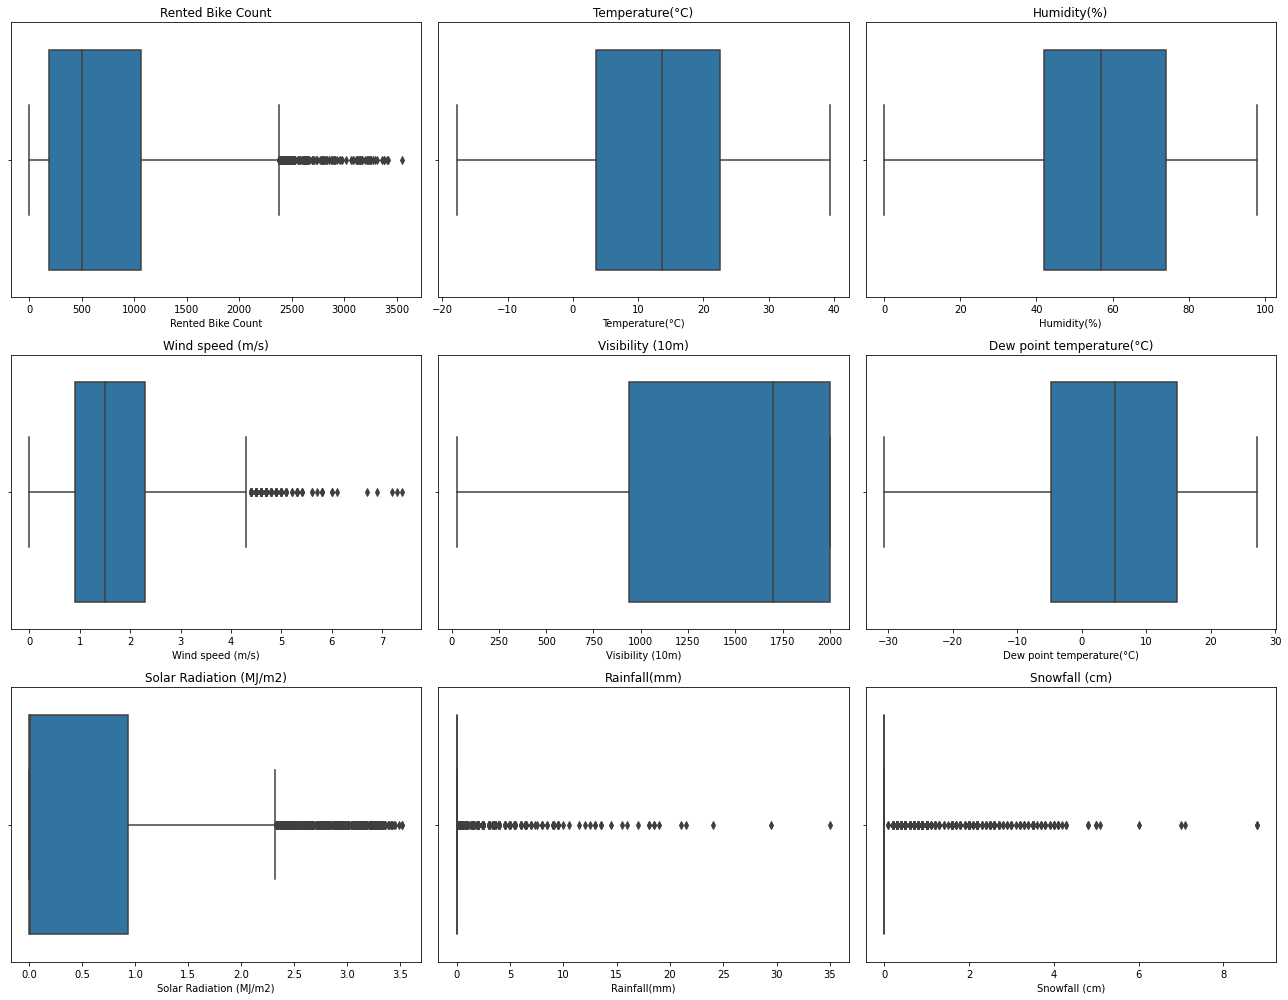

In [ ]:
# Checking for Outliers in numerical datasets
n = 1
plt.figure(figsize=(18,14))

for i in numerical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()


In [ ]:
# We don't think outliers in this data will be a problem.

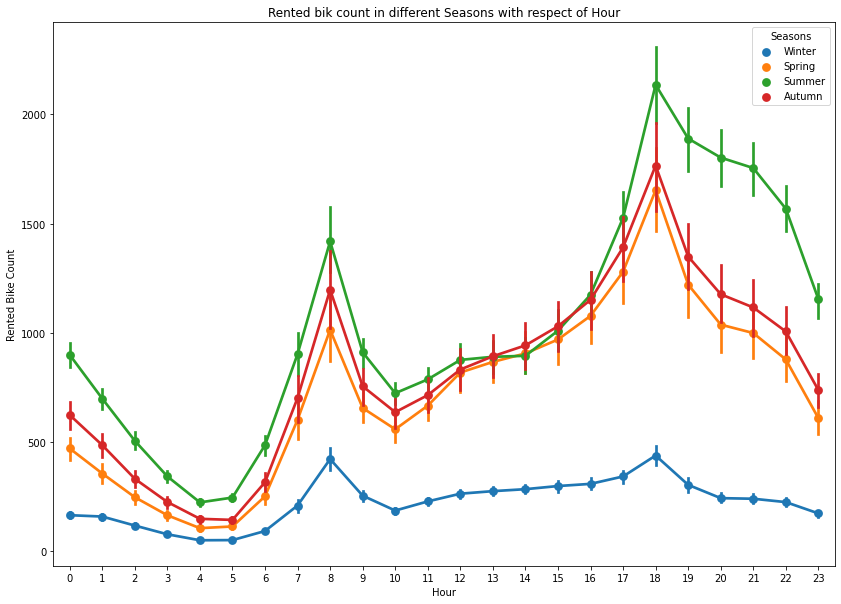

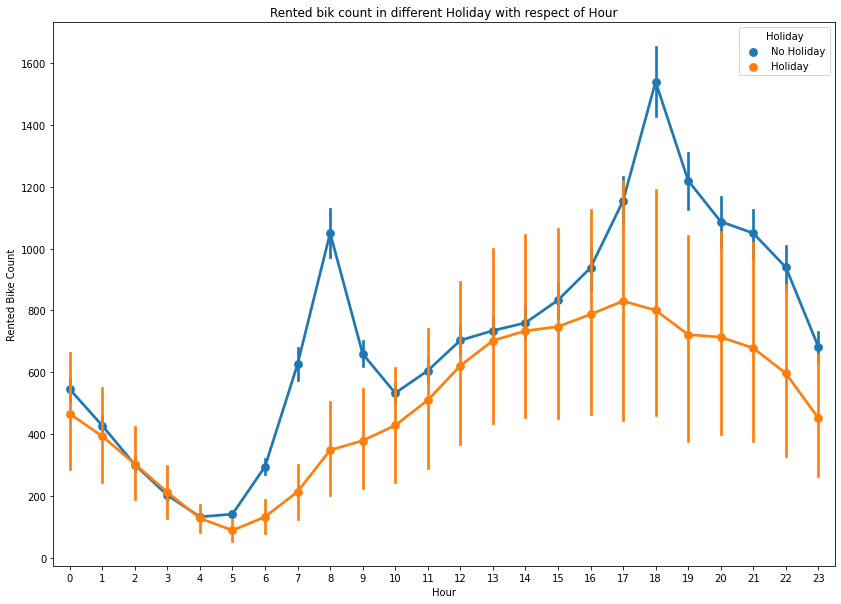

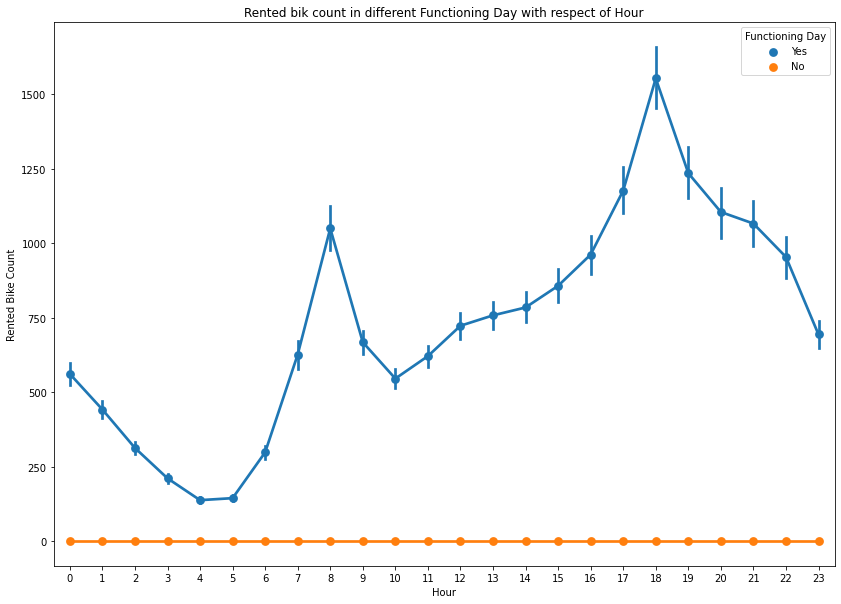

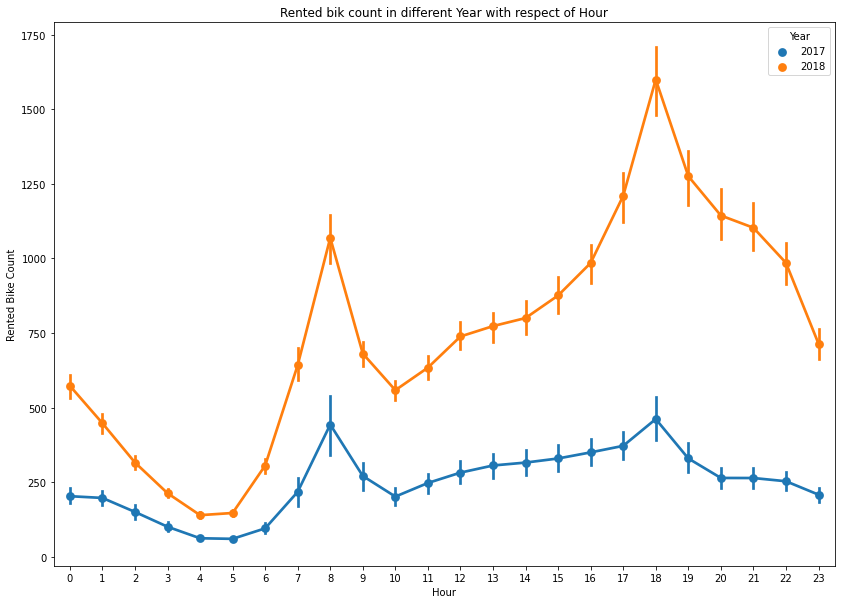

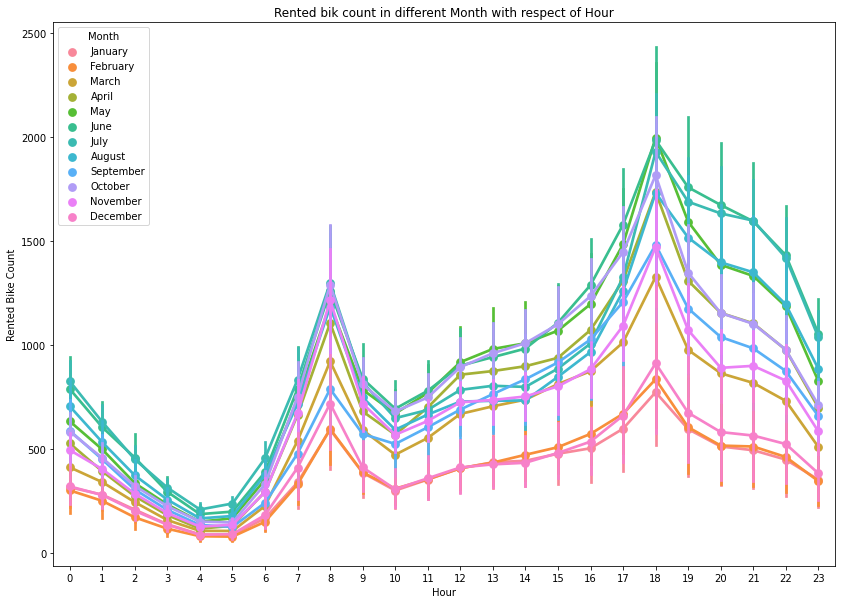

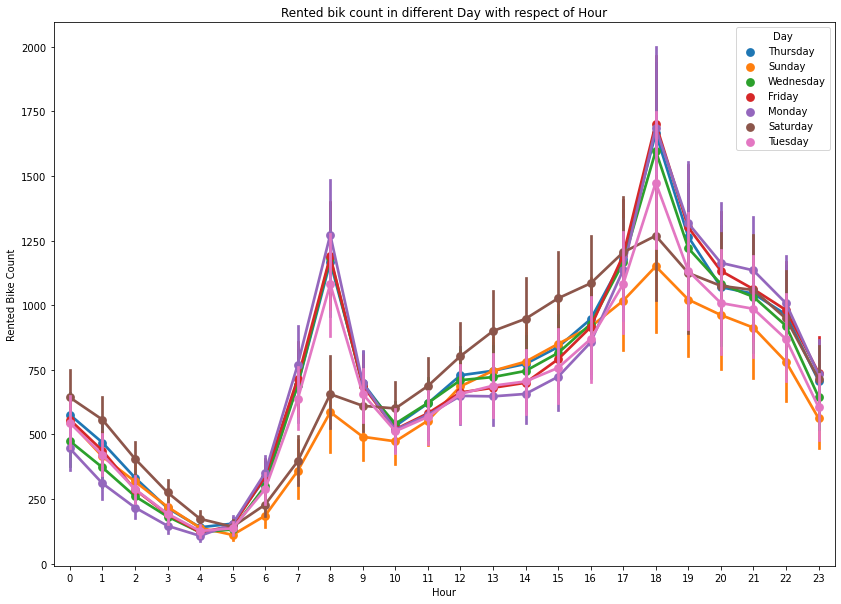

In [ ]:
# Creating pointplots with Rented bike count in different hours with categorical features
for i in categorical_features.columns:
  if i=='Hour':
    pass
  else:
    plt.figure(figsize=(14,10))
    sns.pointplot(x=bike_df['Hour'], y=bike_df['Rented Bike Count'], hue=bike_df[i])
    plt.title(f'Rented bik count in different {i} with respect of Hour')
  plt.show()

In [ ]:
bike_df.groupby(['Seasons'])['Rented Bike Count'].mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

In [ ]:
bike_df.groupby(['Holiday'])['Rented Bike Count'].mean()

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

Text(0, 0.5, 'Rented Bike Count')

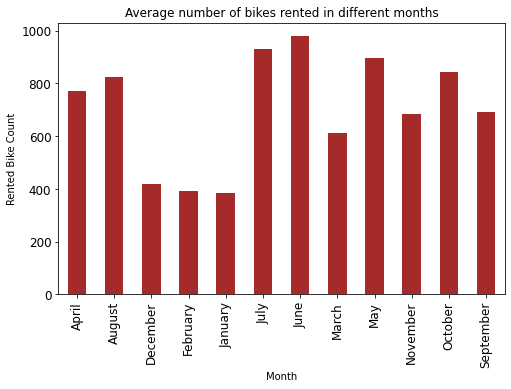

In [ ]:
ax = bike_df.groupby(['Month'])['Rented Bike Count'].mean().plot.bar(figsize=(8,5),fontsize=12,color='Brown')
ax.set_title('Average number of bikes rented in different months')
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Rented Bike Count', fontsize=10)

In [ ]:
bike_df.groupby(['Month'])['Rented Bike Count'].mean()

Month
April        772.526389
August       825.524194
December     419.047043
February     393.023810
January      386.080645
July         929.219086
June         981.566667
March        611.608871
May          895.091398
November     685.294444
October      842.725806
September    693.508333
Name: Rented Bike Count, dtype: float64

In [ ]:
bike_df.groupby(['Hour'])['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

In [ ]:
bike_df.groupby(['Day'])['Rented Bike Count'].mean()

Day
Friday       734.449346
Monday       719.635833
Saturday     730.348558
Sunday       615.968364
Thursday     743.803686
Tuesday      678.362421
Wednesday    714.521226
Name: Rented Bike Count, dtype: float64

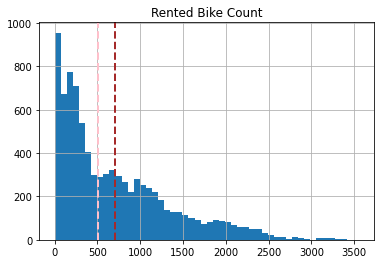

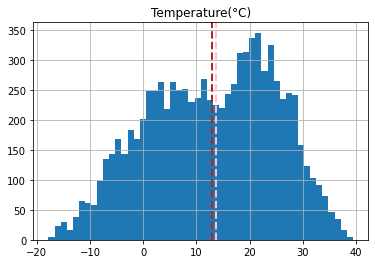

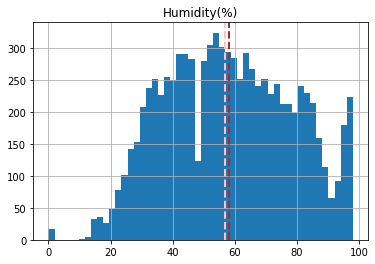

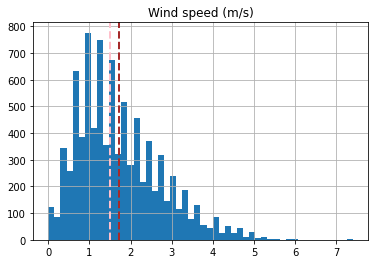

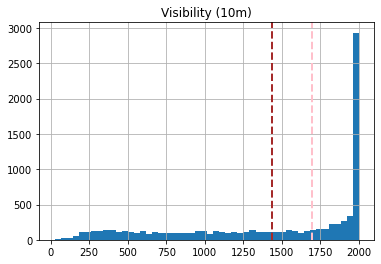

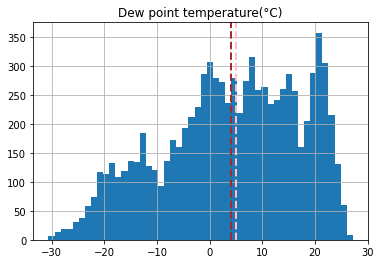

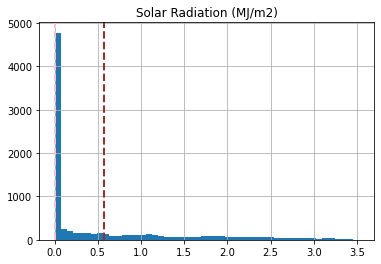

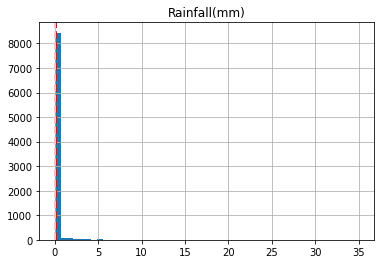

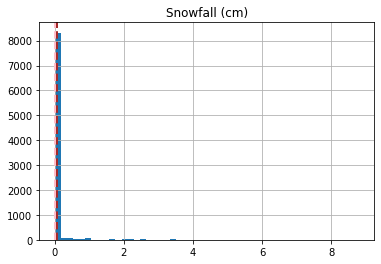

In [ ]:
# plotting histogram for the numeric features
for i in numerical_features[:]:
  fig= plt.figure()
  ax = fig.gca()
  feature = bike_df[i]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='brown',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='pink',linestyle='dashed',linewidth=2)
  ax.set_title(i)

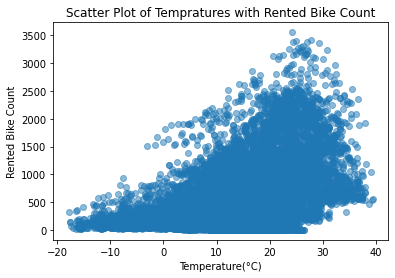

In [ ]:
plt.scatter(bike_df['Temperature(°C)'],bike_df['Rented Bike Count'],alpha=0.5)
plt.title('Scatter Plot of Tempratures with Rented Bike Count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

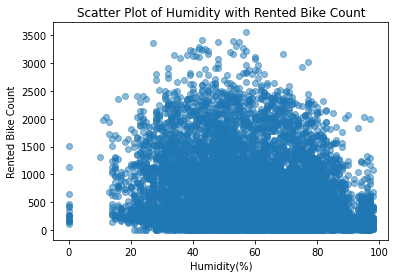

In [ ]:
plt.scatter(bike_df['Humidity(%)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Humidity with Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.show()

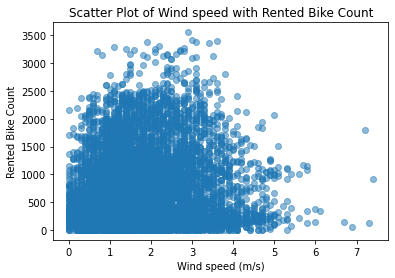

In [ ]:
plt.scatter(bike_df['Wind speed (m/s)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Wind speed with Rented Bike Count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

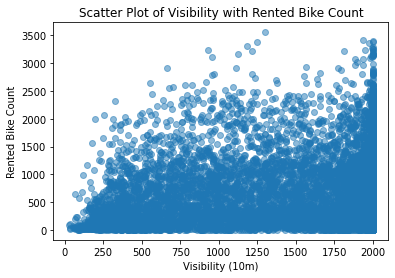

In [ ]:
plt.scatter(bike_df['Visibility (10m)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Visibility with Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.show()

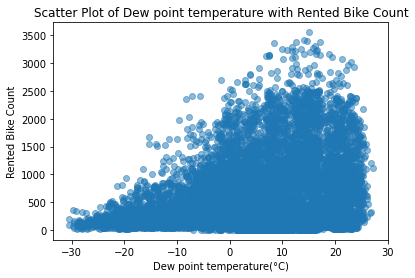

In [ ]:
plt.scatter(bike_df['Dew point temperature(°C)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Dew point temperature with Rented Bike Count')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

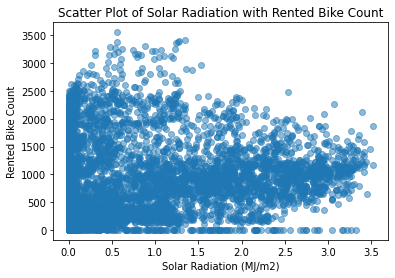

In [ ]:
plt.scatter(bike_df['Solar Radiation (MJ/m2)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Solar Radiation with Rented Bike Count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.show()

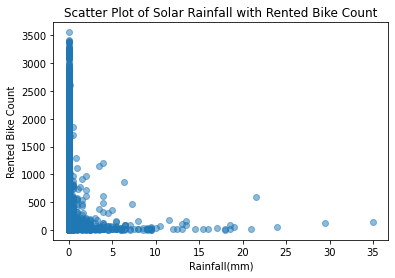

In [ ]:
plt.scatter(bike_df['Rainfall(mm)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Solar Rainfall with Rented Bike Count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.show()

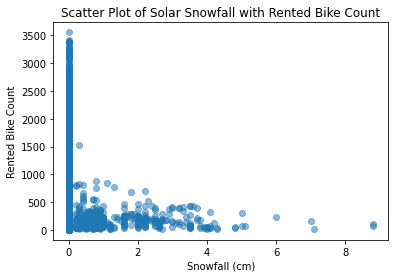

In [ ]:
plt.scatter(bike_df['Snowfall (cm)'],bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Solar Snowfall with Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.show()

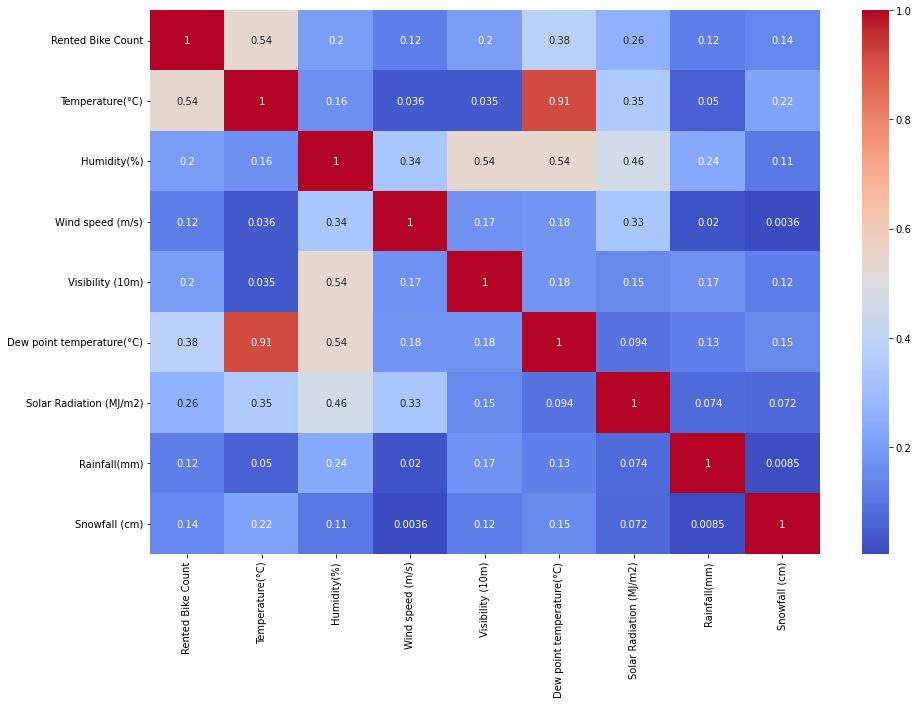

In [ ]:
# checking the multicollinearity in numerical features
plt.figure(figsize=(15,10))
sns.heatmap(abs(numerical_features.corr()),annot=True,cmap='coolwarm',)

In [ ]:
# We can see there is high multicollinearity in Tempreature and Dew point temprature

In [ ]:
# Dropping Dew point temprature
bike_df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [ ]:
bike_df = pd.get_dummies(bike_df,drop_first =True)
bike_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Month_May,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-12,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-12,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-12,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2017-01-12,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-01-12,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-12 to 2018-11-30
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7

In [ ]:
# Now there is no features having dtype object

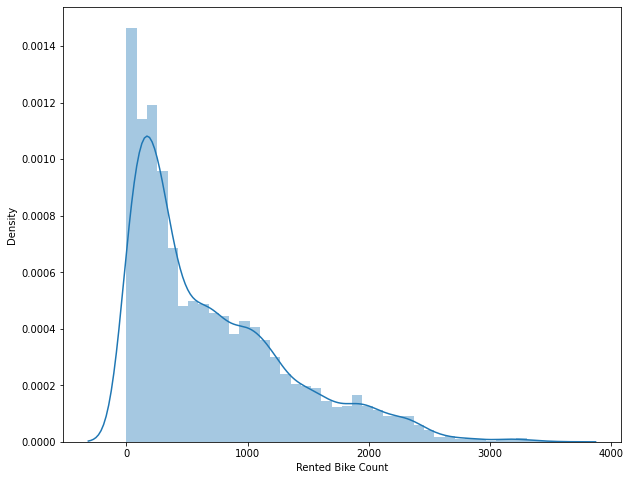

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bike_df['Rented Bike Count'])

In [ ]:
# So it is rightly skewed, we can use log or sqrt

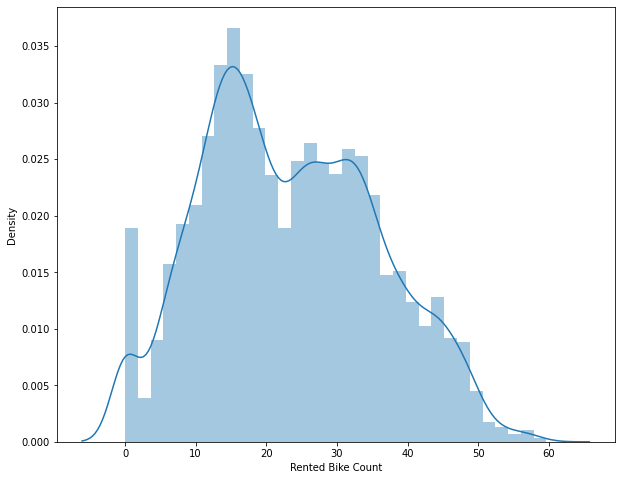

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']))

In [ ]:
# It is normalized to some extent

In [ ]:
# taking independent variables
X = bike_df.drop(columns='Rented Bike Count')
# taking dependent variable
Y = np.sqrt(bike_df['Rented Bike Count'])

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# train test split data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6570, 53)
(2190, 53)


In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(6570,)
(2190,)


## **Linear and Polynomial Regression implementation**

In [ ]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
LR.coef_

array([ 4.65933101e-01, -1.44048474e-01, -7.45663094e-02,  3.85218907e-04,
        1.06528157e+00, -1.51478311e+00,  1.64820028e-01, -1.96183415e+00,
       -4.59450442e+00, -7.35706897e+00, -9.81567229e+00, -9.43545284e+00,
       -4.70940574e+00,  1.81759911e+00,  7.43341247e+00,  5.55513001e-01,
       -3.92209859e+00, -4.30163315e+00, -3.24454104e+00, -3.51244062e+00,
       -3.34448721e+00, -2.16550825e+00, -6.72121498e-01,  3.65881243e+00,
        9.43978377e+00,  6.72323868e+00,  6.23094581e+00,  6.48331026e+00,
        5.01357920e+00,  1.49953240e+00, -3.24142653e+00, -3.36407042e+00,
       -7.96431471e+00,  2.72067158e+00,  2.79151531e+01, -2.31571663e+00,
       -9.29742238e-01, -4.78151136e-02, -6.47630365e-01,  1.55361232e-01,
       -4.26263696e-01,  3.81702906e+00,  1.74169867e-01,  1.59033430e+00,
        4.32609118e-01,  1.79954831e+00, -2.35136241e-01, -2.78386718e-01,
       -4.63767014e-01, -1.50134769e+00, -4.51581595e-01, -6.12425822e-01,
       -1.06668234e-01])

In [ ]:
LR.intercept_

1.6247249226013878

In [ ]:
test_pred_lr = LR.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,test_pred_lr)
rmse = np.sqrt(mse)
print('Mean squared error is :',mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 34.85291820304935
Root mean squared error is : 5.903636015461094


In [ ]:
linear = r2_score(Y_test,test_pred_lr)
linear

0.7753016389245398

In [ ]:
# 77 % R-squared score with linear regression

**Polynomial Regression Implementation**

In [ ]:
poly = PolynomialFeatures()
poly_x_train = poly.fit_transform(X_train)
poly_x_test = poly.transform(X_test)

In [ ]:
LR.fit(poly_x_train,Y_train)

LinearRegression()

In [ ]:
test_poly = LR.predict(poly_x_test)

In [ ]:
mse = mean_squared_error(Y_test,test_poly)
rmse = np.sqrt(mse)
print('Mean squared error is :', mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 19.06830126680313
Root mean squared error is : 4.366726607746714


In [ ]:
polynomial = r2_score(Y_test,test_poly)
polynomial

0.8770657877718568

In [ ]:
# approx 88 percent r2 score

## **Lasso and Ridge Implementation**

In [ ]:
lasso = Lasso(alpha=0.1,max_iter=2000)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, max_iter=2000)

In [ ]:
lasso.intercept_

3.6230664803207695

In [ ]:
test_pred_lasso = lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,test_pred_lasso)
rmse = np.sqrt(mse)
print('Mean squared error is :',mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 41.57397904771741
Root mean squared error is : 6.447788694406587


In [ ]:
Lasso = r2_score(Y_test,test_pred_lasso)
Lasso

0.7319706516113103

In [ ]:
# 73 % score with lasso

In [ ]:
# Ridge implementation
ridge = Ridge()
ridge.fit(X_train,Y_train)

Ridge()

In [ ]:
ridge.intercept_

1.6972115725614998

In [ ]:
test_ridge = ridge.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,test_ridge)
rmse = np.sqrt(mse)
print('Mean squared error is :',mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 34.857883685509236
Root mean squared error is : 5.9040565449112385


In [ ]:
Ridge = r2_score(Y_test,test_ridge)
Ridge

0.7752696262315371

In [ ]:
# 77 % score with ridge

## **Decision Tree Implementation**

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
test_dt = DT.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,test_dt)
rmse = np.sqrt(mse)
print('Mean squared error is :',mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 31.382651710575086
Root mean squared error is : 5.60202210907589


In [ ]:
# test accuracy
decision_tree = r2_score(Y_test,test_dt)
decision_tree

0.7976746060549029

In [ ]:
# 80 percent score with Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
dt_regressor = DecisionTreeRegressor(random_state=10)
CV_DT = cross_val_score(dt_regressor, X_train, Y_train, cv = 10).mean()
CV_DT

0.7953825442108986

# **Random Forest Implementation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = {'n_estimators':[100,150,200],
              'min_samples_leaf':[6,4,2],
              'max_depth' : [30,20,25],
              'min_samples_split': [30,25,20],
              }

In [ ]:
random_forest = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)

In [ ]:
random_forest.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [30, 20, 25],
                         'min_samples_leaf': [6, 4, 2],
                         'min_samples_split': [30, 25, 20],
                         'n_estimators': [100, 150, 200]})

In [ ]:
random_forest.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=20)

In [ ]:
train_rf = random_forest.predict(X_train)
test_rf = random_forest.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,test_rf)
rmse = np.sqrt(mse)
print('Mean squared error is :',mse)
print('Root mean squared error is :', rmse)

Mean squared error is : 16.11591034905905
Root mean squared error is : 4.014462647610394


In [ ]:
r2_score(Y_train,train_rf)

0.9407852921699502

In [ ]:
RF = r2_score(Y_test,test_rf)
RF

0.896099987336045

In [ ]:
# Approx 90% score with Random Forest

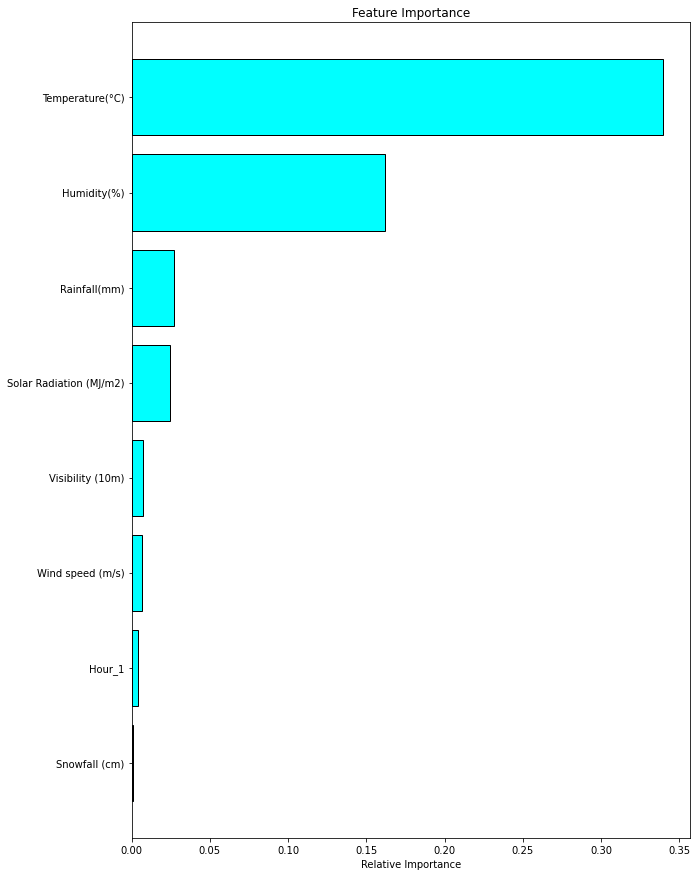

In [ ]:
best =random_forest.best_estimator_
features = X_test.columns
importances = best.feature_importances_[0:8]
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='cyan',edgecolor='black' ,align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
    
  

# **Accuracy Score with different algorithms**

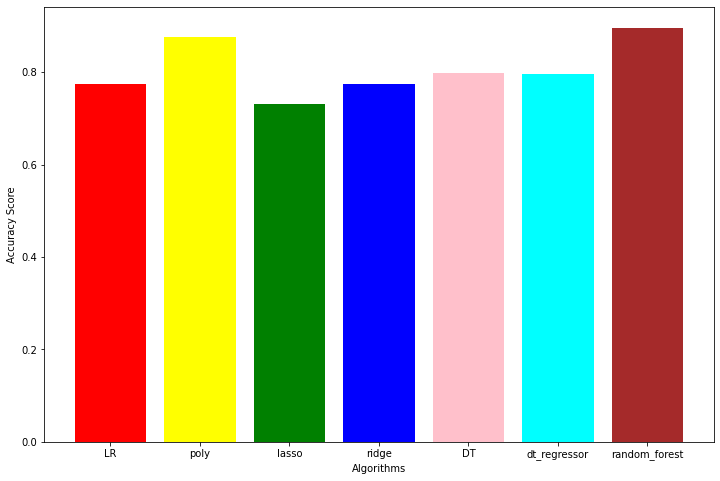

In [ ]:
# Plotting Bar graph for Accuracy scores by different algorithms
plt.figure(figsize=(12,8))
plt.bar(x=['LR','poly','lasso','ridge','DT','dt_regressor','random_forest'], height=[linear,polynomial,Lasso,Ridge,decision_tree,CV_DT,RF], color = ['red','yellow','green','blue','pink','cyan','brown'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
# Random forest has the highest accuracy so it is best for this dataset.